## Task: Housing Price Prediction

Executed by: Aryavart Chaudhary



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HousingData.csv to HousingData (1).csv


In [ ]:
df = pd.read_csv("HousingData.csv")


2) Data preprocessing : Check for null values and replace or drop them, scale the data,encode the categorical data(if any) etc.

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.isnull()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


3) Visualizing some of the attributes of the dataset.

In [ ]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


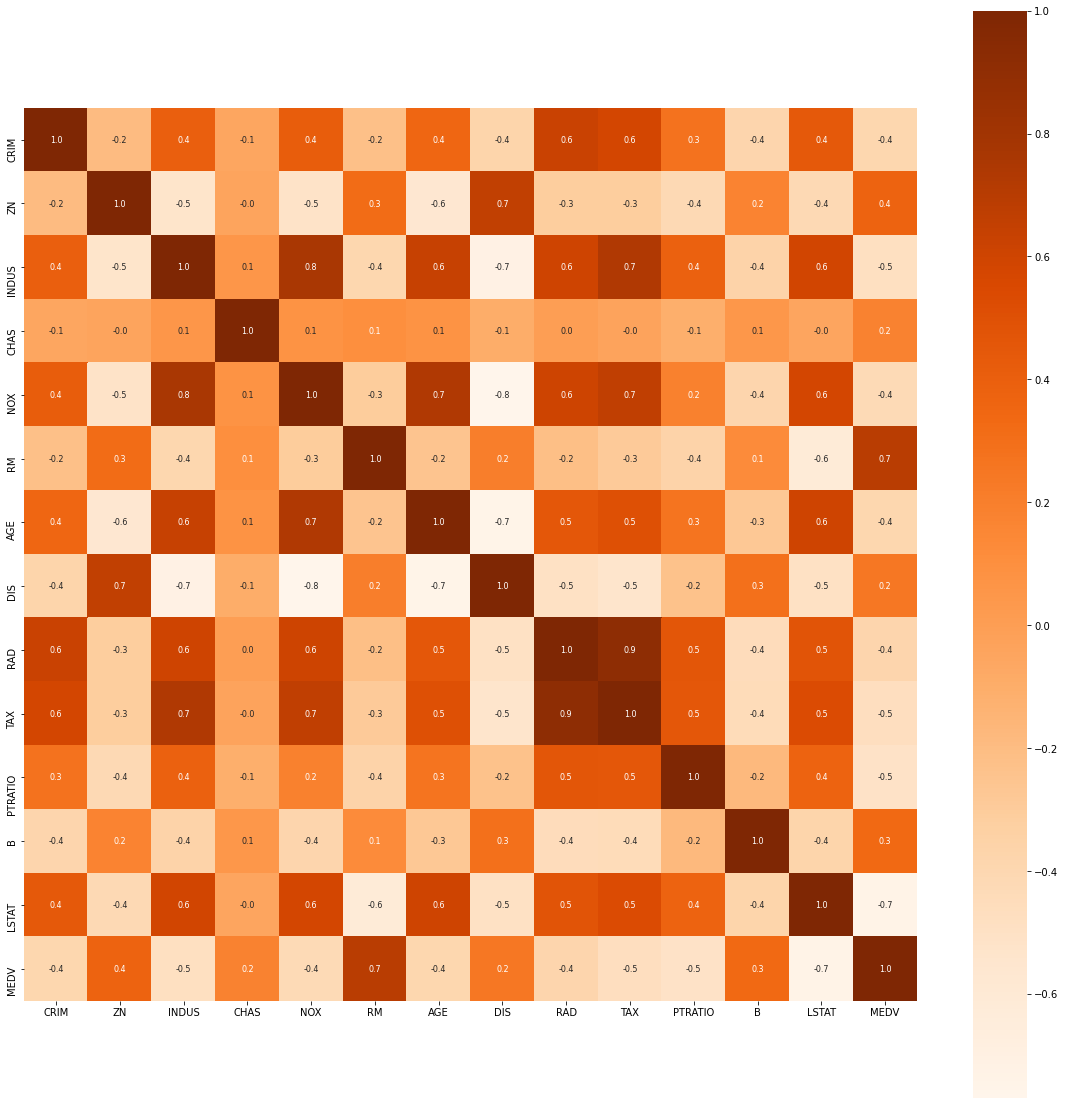

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Oranges')

**Data features :**

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s



***Obsevations :***
1. RM has a strong positive correlation with MEDV (0.7)

2. LSTAT has a high negative correlation with MEDV(-0.74).

3. RAD and TAX are stronly correlated, so we don't include this in our features together to avoid multi-colinearity. The features RAD, TAX have a correlation of 0.91.

4.  The prices increases as the value of RM increases. 

5. The prices tend to decrease with an increase in Percentage of lower status of the population(LSTAT).

6. MEDV is strongly correlated to LSTAT, RM

Split your whole dataset between training and testing dataset.


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = df.drop('MEDV',axis=1)
y = df['MEDV']
print(df.shape)
print(X.shape)
print(y.shape)

(506, 14)
(506, 13)
(506,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y , test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


Predict the price using the following algorithms:

a) Linear Regression

In [ ]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
features = ['LSTAT', 'RM']
target = boston['MEDV']
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_train)
print("Training Accuracy:",model.score(X_train,y_train)*100)
print("Testing Accuracy:",model.score(X_test,y_test)*100)

from sklearn.metrics import mean_squared_error, r2_score
print("Model Accuracy:",r2_score(y,model.predict(X))*100)

Training Accuracy: 66.18625964841894
Testing Accuracy: 54.090848271864175
Model Accuracy: 63.84436355294365


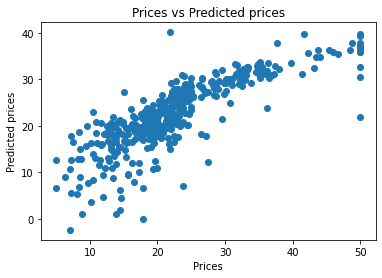

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

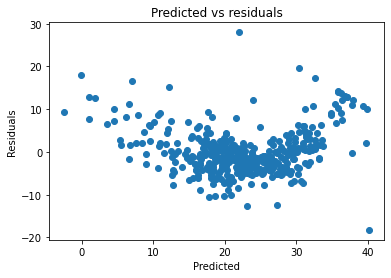

In [ ]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

b) KNN

In [ ]:
from numba import jit
import matplotlib.pyplot as pyplot
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def get_r_squared(max_neighbors=10, samples=100):
    train_score = []
    test_score = []
    models = []
    inputs, values = make_regression(n_samples=samples)
    X_train, X_test, y_train, y_test = train_test_split(inputs, values)

    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors, n_jobs=4)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models

([1.0,
  0.619385801979649,
  0.6153681950321739,
  0.49868092437942446,
  0.4692858874949901,
  0.4123501272640636,
  0.38987649574924876,
  0.40084370121691115,
  0.4107585894972826,
  0.41312508337854403,
  0.42133522496548603,
  0.4127018204378111,
  0.38605489583440555,
  0.38647106433470957,
  0.3775904651195754,
  0.35791577880146574,
  0.36752727030108545,
  0.34874484305247866,
  0.32414056061839214,
  0.3134599905396035],
 [-0.6662078183983211,
  -0.20471203538063354,
  0.05494894870229283,
  0.10900526031130198,
  0.046130320851513695,
  0.10730650881437165,
  0.17638090293872233,
  0.14180443497758277,
  0.19859191411622645,
  0.13891223655701368,
  0.1443713705317924,
  0.14945244723479245,
  0.17426908883481762,
  0.1785681475117148,
  0.18044284622670892,
  0.1717144319121796,
  0.17904752516963474,
  0.17328778781650367,
  0.17906679629233335,
  0.1686409256142769],
 [KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_pa

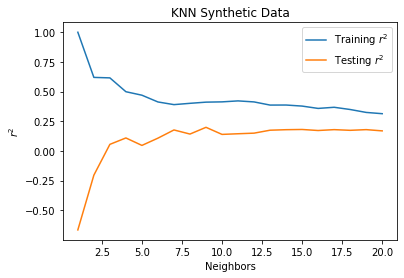

In [ ]:
def plot_r_squared(neighbors=20, samples=100):
    train_score, test_score, models = get_r_squared(neighbors, samples)
    neighbors = range(1, neighbors+1)
    pyplot.plot(neighbors, train_score, label="Training $r^2$")
    pyplot.plot(neighbors, test_score, label="Testing $r^2$")
    pyplot.xlabel("Neighbors")
    pyplot.ylabel("$r^2$")
    pyplot.title("KNN Synthetic Data")
    pyplot.legend()
    return train_score, test_score, models
plot_r_squared()


([1.0,
  0.63433027724936,
  0.5728177967789885,
  0.5298428293856152,
  0.49829118807746586,
  0.47886413822590784,
  0.46331389554644575,
  0.44542233692069433,
  0.43368068278383276,
  0.43339925184254213,
  0.41622778437038416,
  0.4111909983722861,
  0.4131809825133097,
  0.40721844310877686,
  0.39865530822410455,
  0.38673118128708794,
  0.3827749722427776,
  0.3786824687106222,
  0.37686135664035203,
  0.373913221681625],
 [-0.18889998181280054,
  0.14679137711078183,
  0.21253839026618437,
  0.23449808497174862,
  0.26782626768143614,
  0.2618664175185379,
  0.28180504361811876,
  0.2905532234466899,
  0.2886110566142369,
  0.31500015119787517,
  0.3056623447172132,
  0.3049145398314205,
  0.28676366380449037,
  0.28341339080265315,
  0.2983433242025595,
  0.3006985962720554,
  0.29400794890001625,
  0.2845957168906882,
  0.280012584331673,
  0.2818211308150085],
 [KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None,

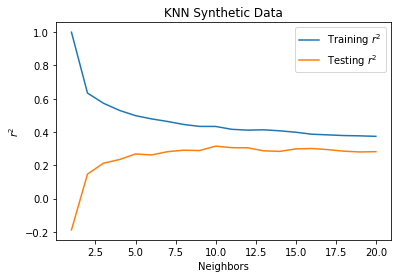

In [ ]:
plot_r_squared(samples=1000)

([1.0,
  0.6843445092057308,
  0.5780600381916611,
  0.5397650185727572,
  0.5128254664493099,
  0.48196092168169247,
  0.46200043985581973,
  0.4576352303801453,
  0.4474881259338912,
  0.43739436060000597,
  0.42777456756564,
  0.4227147902389844,
  0.41230853608333407,
  0.4090753512426799,
  0.39950475643350314,
  0.38924926555870376,
  0.38864287153873955,
  0.3828881835938518,
  0.3743952050235188,
  0.3667391055890712,
  0.36828279353487703,
  0.366632700167313,
  0.36301508383407755,
  0.35609969426468036,
  0.35264044098663133,
  0.35299202231732874,
  0.34964615462610704,
  0.3479382051797494,
  0.3458230910850403,
  0.34335264638174834,
  0.34220403459962134,
  0.33989927727718217,
  0.34163482588915894,
  0.3411727911879806,
  0.34130206657099826,
  0.34223115100997265,
  0.34311902657942417,
  0.3388624375324696,
  0.335257287280859,
  0.33352267271338837,
  0.3312636746790124,
  0.3306824059198027,
  0.3316835442838316,
  0.3306229148496982,
  0.3309184439593974,
  0.3276

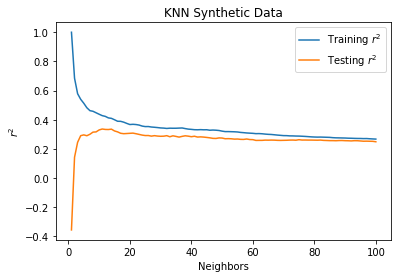

In [ ]:
plot_r_squared(neighbors=100, samples=1000)

In [ ]:
def get_r_squared(max_neighbors=10):
    train_score = []
    test_score = []
    models = []
    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models

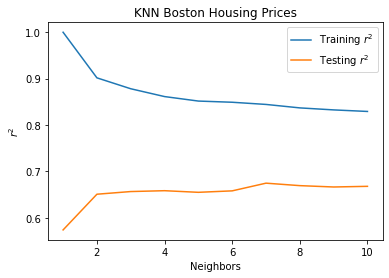

In [ ]:
train_score, test_score, models = get_r_squared()
neighbors = range(1, 11)
pyplot.plot(neighbors, train_score, label="Training $r^2$")
pyplot.plot(neighbors, test_score, label="Testing $r^2$")
pyplot.xlabel("Neighbors")
pyplot.ylabel("$r^2$")
pyplot.title("KNN Boston Housing Prices")
pyplot.legend()

Evaluation Metrics

In [ ]:
print('R2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2: 0.6618625964841894
MAE: 3.911260637542154
MSE: 28.79027648205344
RMSE: 5.365657134224422
